In [13]:
from keras.datasets import mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data() 

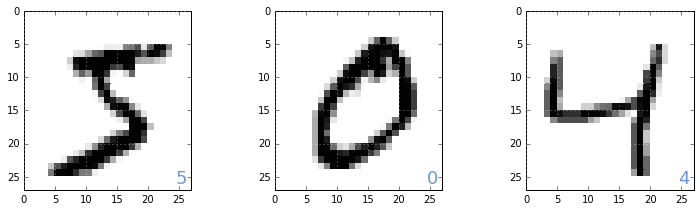

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1 , figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1)
    img = x_train[id,:,:]
    plt.pcolor(255-img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue',fontsize=18)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.grid('on', color='white')
plt.show()

In [15]:
#-- リスト 8-1-(3)
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)  # (A)
x_train = x_train.astype('float32')   # (B)
x_train = x_train / 255               # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)  # (D)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [16]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy']) # (D)

In [17]:
#-- リスト 8-1-(5)
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test))  # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 2.0620 - acc: 0.2884 - val_loss: 1.7861 - val_acc: 0.5005
Epoch 2/10
60000/60000 [==============================] - 1s 10us/step - loss: 1.6054 - acc: 0.6516 - val_loss: 1.4368 - val_acc: 0.7672
Epoch 3/10
60000/60000 [==============================] - 1s 10us/step - loss: 1.3189 - acc: 0.7882 - val_loss: 1.1978 - val_acc: 0.8200
Epoch 4/10
60000/60000 [==============================] - 1s 10us/step - loss: 1.1126 - acc: 0.8247 - val_loss: 1.0186 - val_acc: 0.8445
Epoch 5/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.9540 - acc: 0.8436 - val_loss: 0.8791 - val_acc: 0.8587
Epoch 6/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.8305 - acc: 0.8588 - val_loss: 0.7715 - val_acc: 0.8711
Epoch 7/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.7354 - acc: 0.8692 - val_loss: 0.6880 - val_acc

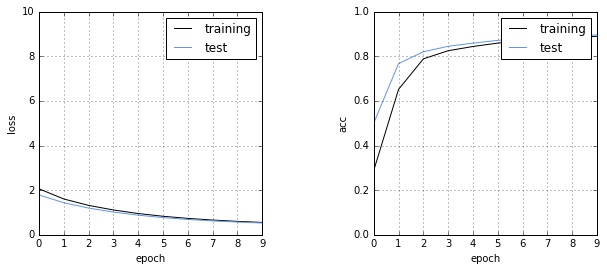

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='training', color='black')
plt.plot(history.history['val_acc'], label='test', color='cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()
            

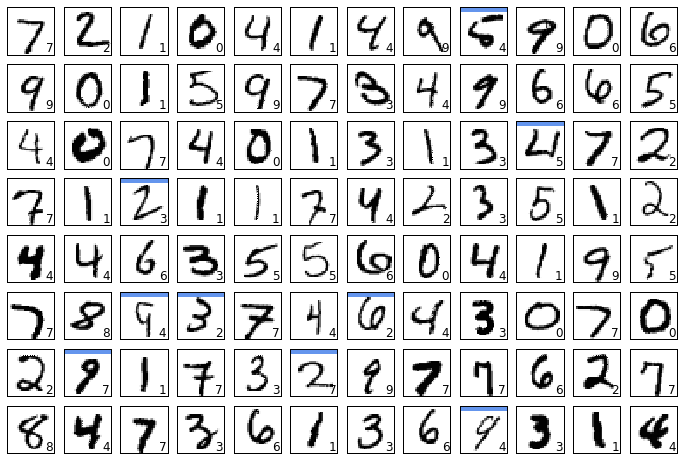

In [19]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x = x_test[i, :]
        x = x.reshape(28,28)
        plt.pcolor(1-x)
        wk = y[i,:]
        prediction = np.argmax(wk)
        plt.text(22,25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1], color='cornflowerblue', linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()
    

In [20]:
# activationをsigmoidからreluに変更
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='relu')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy']) # (D)

import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test))  # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 1.5415 - acc: 0.5445 - val_loss: 0.8977 - val_acc: 0.8072
Epoch 2/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.6675 - acc: 0.8453 - val_loss: 0.4979 - val_acc: 0.8777
Epoch 3/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.4507 - acc: 0.8829 - val_loss: 0.3894 - val_acc: 0.9000
Epoch 4/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.3748 - acc: 0.8988 - val_loss: 0.3392 - val_acc: 0.9107
Epoch 5/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.3349 - acc: 0.9077 - val_loss: 0.3101 - val_acc: 0.9169
Epoch 6/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.3091 - acc: 0.9133 - val_loss: 0.2917 - val_acc: 0.9202
Epoch 7/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.2910 - acc: 0.9179 - val_loss: 0.2760 - val_acc

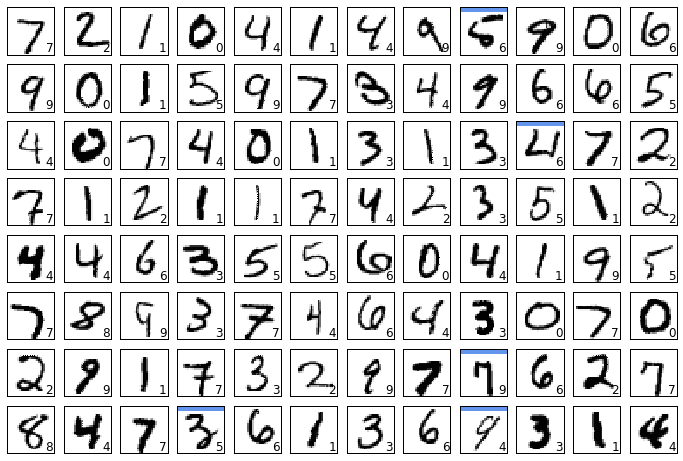

In [21]:
show_prediction()
plt.show()

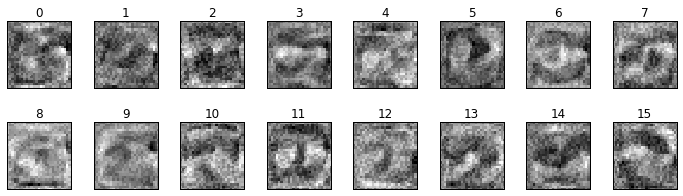

In [23]:
# 一層目の重みの視覚化
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12,3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
    plt.subplot(2, 8 , i +1)
    w1 = w[:,i]
    w1 = w1.reshape(28,28)
    plt.pcolor(-w1)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()